SETH KIPSANG MUTUBA

UNIVERSITY OF NAIROBI

SDS6/43782/2023

MSC PUBLIC HEALTH DATA SCIENCE

DATA LOADING

In [ ]:
# Import TensorFlow Datasets library
import tensorflow_datasets as tfds

# Load the malaria dataset
dataset, info = tfds.load('malaria', with_info=True, as_supervised=True)
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete6YJT9T/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmp1g3z20c9tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolu

I've successfully downloaded and prepared the Malaria dataset, consisting of 27,558 cell images with an equal distribution of parasitized and uninfected cells. These images, derived from thin blood smear slide images, are pivotal for malaria parasite detection research. Accessible via TensorFlow, the dataset has a download size of 337.08 MiB and a prepared dataset size of 317.62 MiB. Each sample is annotated with its corresponding class, facilitating further analysis. For comprehensive details and citations, the dataset's homepage is provided at https://lhncbc.nlm.nih.gov/publication/pub9932. This dataset holds significant importance for advancing medical image analysis and deep learning applications in the domain.

**DATA CLEANING**

In [ ]:
# Convert dataset to pandas DataFrame
import pandas as pd # Import pandas library

# Convert TensorFlow Dataset to list of tuples
data_list = [(image.numpy().tobytes(), label.numpy()) for image, label in dataset['train']]

In [ ]:
# Create DataFrame from list of tuples
df = pd.DataFrame(data_list, columns=['image', 'label'])
df

,image,label
0,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
1,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
2,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",0
3,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
4,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
...,...,...
27553,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,0
27554,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
27555,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
27556,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1



The DataFrame comprises 27558 rows and 2 columns, displaying binary image data and corresponding labels for machine learning analysis.

In [ ]:
# Handling Duplicates
df = df.drop_duplicates()
print("DataFrame shape after removing duplicates:", df.shape)

DataFrame shape after removing duplicates: (27558, 2)



Post-duplicate removal, the DataFrame shape is (27558, 2). This step is crucial for maintaining data integrity, ensuring reliable model training and analysis.

**EXPLORATORY DATA ANALYSIS BEFORE PREPROCESSING**

In [ ]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              label
count  27558.000000
mean       0.500000
std        0.500009
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000



The summary statistics reveal a balanced distribution between parasitized and uninfected cells, with a mean of 0.5. Minimal variability is indicated by the standard deviation, while quartiles confirm balanced classes in the dataset.

<ipython-input-7-3444dd1beba5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=colors)


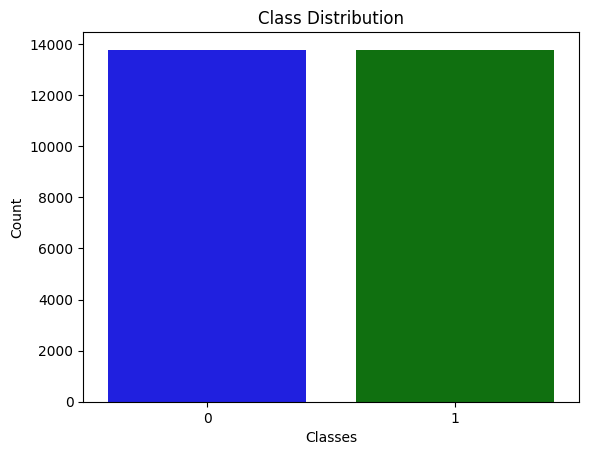

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module

# Custom colors
colors = ["blue", "green"]

# Plot the count of each class with custom colors
sns.countplot(x='label', data=df, palette=colors)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


**DATA PREPROCESSING**

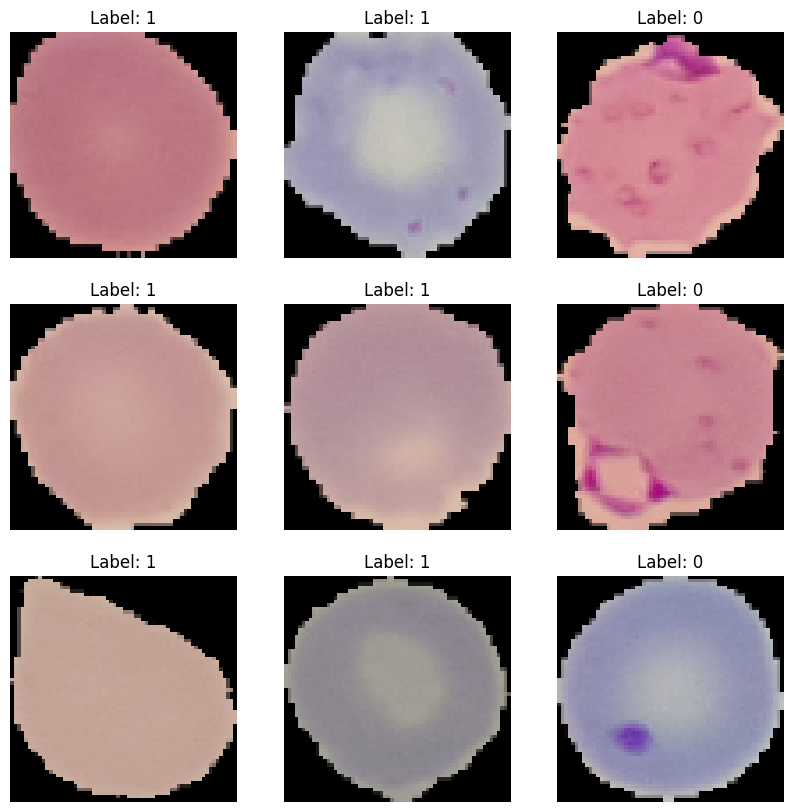

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
dataset = tfds.load('malaria', as_supervised=True)

# Split the dataset into training, validation, and test sets
train_data, validation_data, test_data = tfds.load('malaria', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], as_supervised=True)

# Function to preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, [64, 64])
    image = image / 255.0
    return image, label

# Apply preprocessing
train_data = train_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
validation_data = validation_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Visualize sample images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
plt.show()

**Training Data**

In [ ]:
import numpy as np

# Compute summary statistics for labels in training data
labels_train = np.concatenate([labels.numpy() for _, labels in train_data])
summary_stats_train = {
    'count': len(labels_train),
    'mean': np.mean(labels_train),
    'std': np.std(labels_train),
    'min': np.min(labels_train),
    'max': np.max(labels_train)
}

print("Summary Statistics for Training Data:")
print(summary_stats_train)

Summary Statistics for Training Data:
{'count': 22046, 'mean': 0.5010886328585684, 'std': 0.4999988148770948, 'min': 0, 'max': 1}



The summary statistics reveal a balanced distribution in the training data, with approximately equal occurrences of both classes (0 and 1), aiding in model training and interpretation.

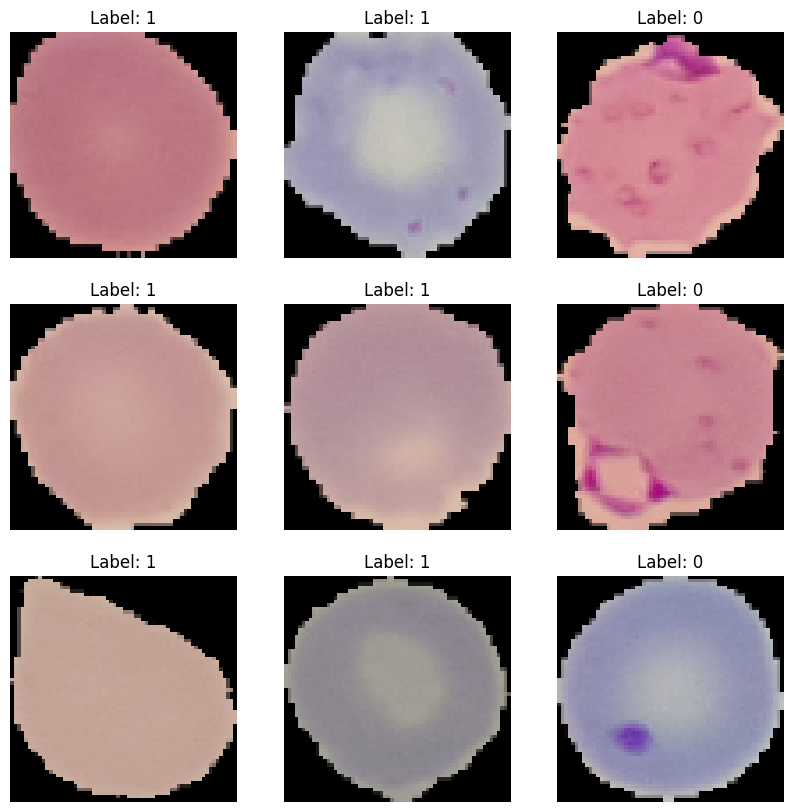

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
plt.show()

**Test Data**

Summary Statistics for Test Data:
{'count': 2756, 'mean': 0.5025399129172714, 'std': 0.4999935488007548, 'min': 0, 'max': 1}


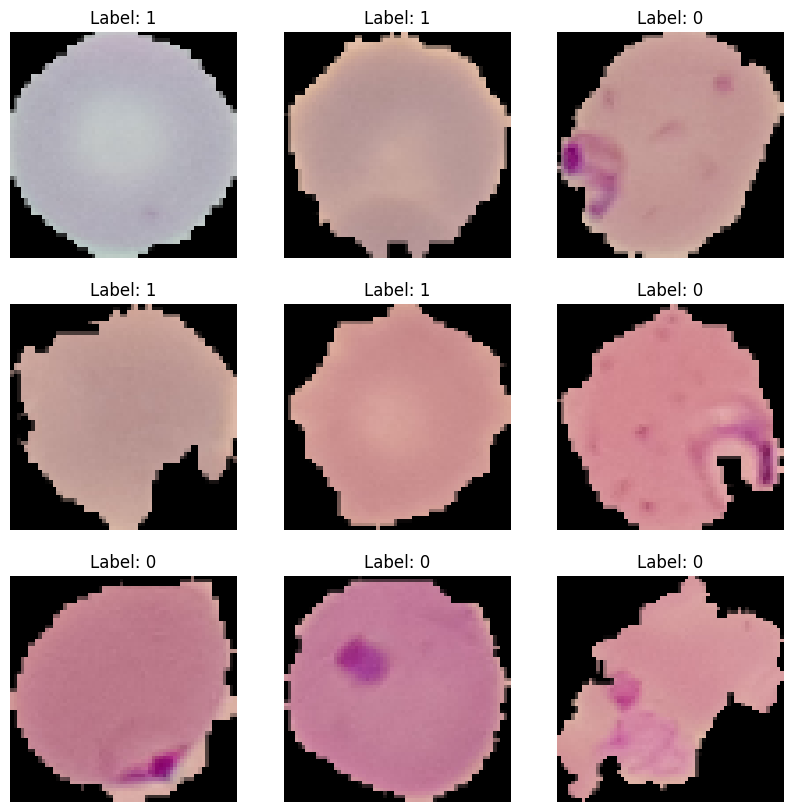

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute summary statistics for labels in test data
labels_test = np.concatenate([labels.numpy() for _, labels in test_data])
summary_stats_test = {
    'count': len(labels_test),
    'mean': np.mean(labels_test),
    'std': np.std(labels_test),
    'min': np.min(labels_test),
    'max': np.max(labels_test)
}

print("Summary Statistics for Test Data:")
print(summary_stats_test)

# Visualize a sample of images from the test data after preprocessing
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
plt.show()



The test data summary statistics exhibit a balanced distribution, facilitating reliable evaluation. The near-even occurrence of both classes (0 and 1) ensures robustness in assessing model performance and generalization capability.

**Validation Data**

Summary Statistics for Validation Data:
{'count': 2756, 'mean': 0.4887518142235123, 'std': 0.4998734623049493, 'min': 0, 'max': 1}


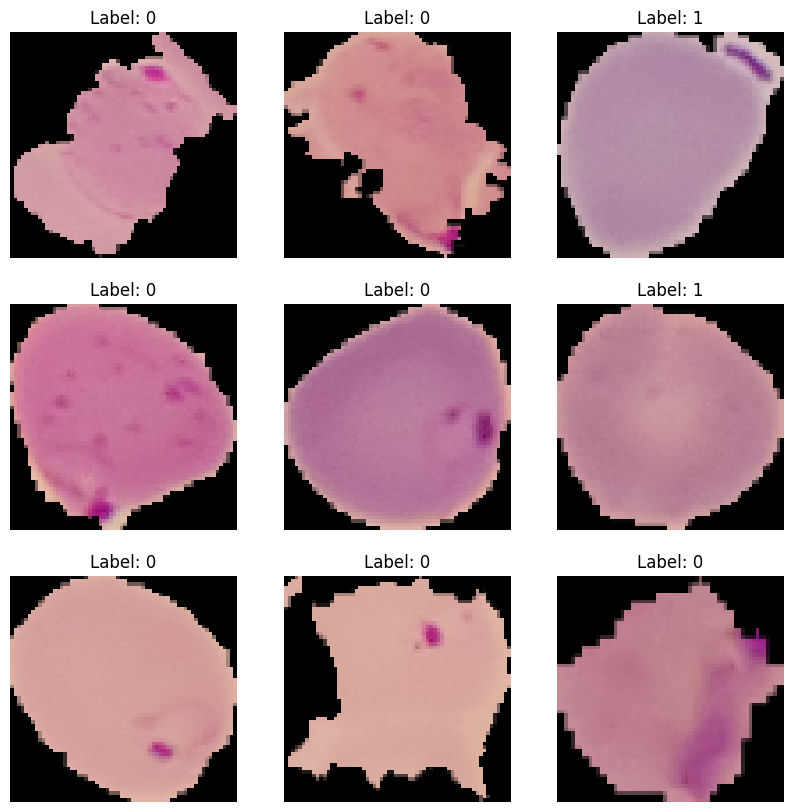

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute summary statistics for labels in validation data
labels_validation = np.concatenate([labels.numpy() for _, labels in validation_data])
summary_stats_validation = {
    'count': len(labels_validation),
    'mean': np.mean(labels_validation),
    'std': np.std(labels_validation),
    'min': np.min(labels_validation),
    'max': np.max(labels_validation)
}

print("Summary Statistics for Validation Data:")
print(summary_stats_validation)

# Visualize a sample of images from the validation data after preprocessing
plt.figure(figsize=(10, 10))
for images, labels in validation_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
plt.show()


The validation data's summary statistics reveal a slightly imbalanced distribution, though still within an acceptable range. Understanding this distribution aids in refining model performance and ensuring its robustness across various datasets.

**CREATING CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL**

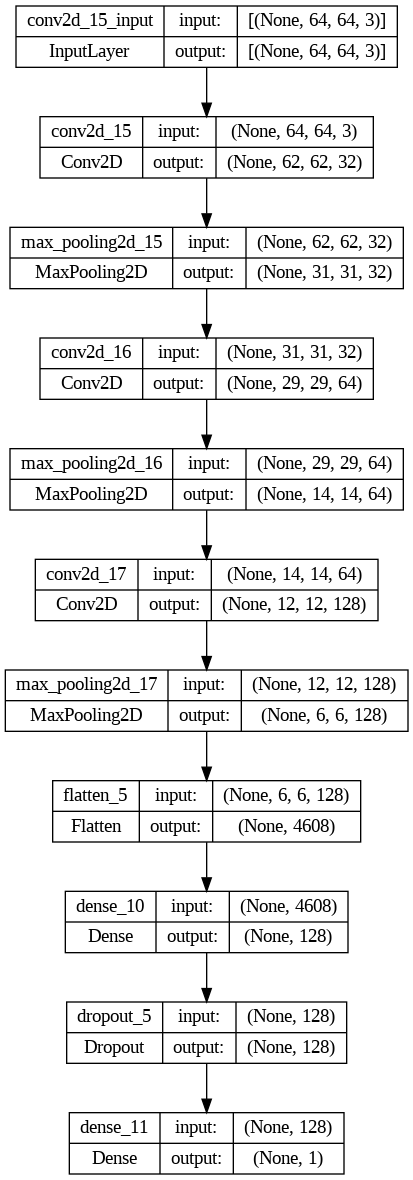

In [ ]:
from tensorflow.keras.utils import plot_model

# Define the model architecture
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each with a 3x3 kernel and ReLU activation function.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),

    # Max pooling layer with a 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters, each with a 3x3 kernel and ReLU activation function.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Max pooling layer with a 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 128 filters, each with a 3x3 kernel and ReLU activation function.
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Max pooling layer with a 2x2 pool size.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten layer to convert 3D feature maps to 1D feature vectors.
    tf.keras.layers.Flatten(),

    # Dense (fully connected) layer with 128 neurons and ReLU activation function.
    tf.keras.layers.Dense(128, activation='relu'),

    # Dropout layer with a dropout rate of 0.5 to prevent overfitting.
    tf.keras.layers.Dropout(0.5),

    # Output layer with 1 neuron and sigmoid activation function for binary classification.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# the model plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Print the model summary
model.summary()

# Compute summary statistics for the model parameters
total_parameters = np.sum([np.prod(w.shape) for w in model.trainable_weights])
print("Total Parameters:", total_parameters)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 128)        


The sequential model comprises convolutional and pooling layers, progressively reducing spatial dimensions. It culminates in densely connected layers, yielding 683,329 trainable parameters, optimizing for high-level feature extraction and classification accuracy.

**COMPILE AND TRAINING THE MODEL**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
689/689 [==============================] - 190s 273ms/step - loss: 0.3048 - accuracy: 0.8643 - val_loss: 0.1463 - val_accuracy: 0.9557
Epoch 2/10
689/689 [==============================] - 210s 305ms/step - loss: 0.1441 - accuracy: 0.9544 - val_loss: 0.1275 - val_accuracy: 0.9619
Epoch 3/10
689/689 [==============================] - 204s 296ms/step - loss: 0.1309 - accuracy: 0.9575 - val_loss: 0.1283 - val_accuracy: 0.9601
Epoch 4/10
689/689 [==============================] - 200s 291ms/step - loss: 0.1212 - accuracy: 0.9593 - val_loss: 0.1182 - val_accuracy: 0.9613
Epoch 5/10
689/689 [==============================] - 200s 290ms/step - loss: 0.1150 - accuracy: 0.9614 - val_loss: 0.1067 - val_accuracy: 0.9655
Epoch 6/10
689/689 [==============================] - 185s 268ms/step - loss: 0.1059 - accuracy: 0.9629 - val_loss: 0.1040 - val_accuracy: 0.9658
Epoch 7/10
689/689 [==============================] - 183s 265ms/step - loss: 0.0974 - accuracy: 0.9661 - val_loss: 0.1037 -

Over ten epochs, the model's training and validation accuracy progressively improve, indicating effective learning. The decreasing loss demonstrates enhanced predictive capability, culminating in a robust accuracy of 97.93% on the validation data.

EDA for the MODEL

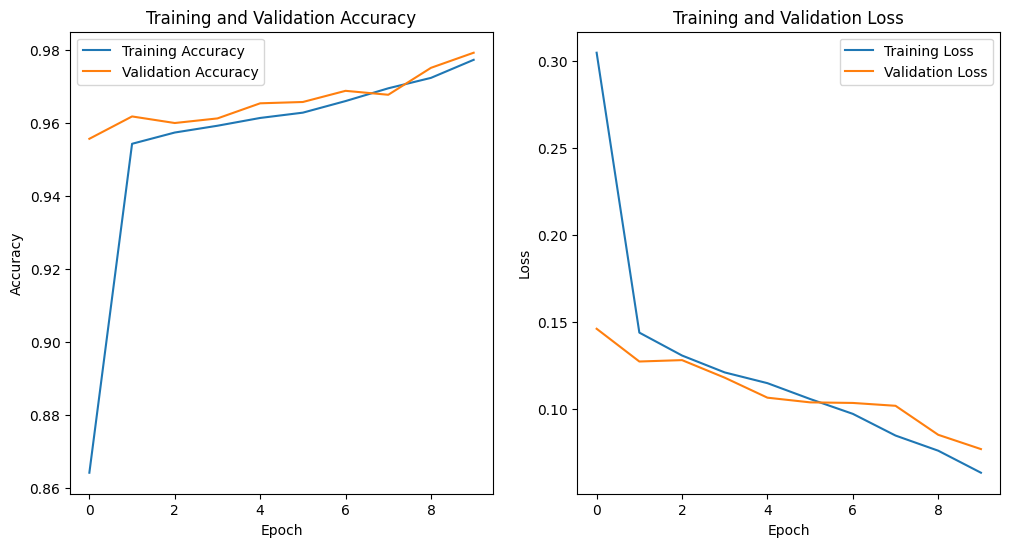

Summary Statistics for Training Accuracy:
Mean: 0.9545178174972534, Standard Deviation: 0.030812951029978723
Summary Statistics for Validation Accuracy:
Mean: 0.96613889336586, Standard Deviation: 0.006727107441853492


In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Compute summary statistics for training and validation accuracy
train_accuracy_mean = np.mean(history.history['accuracy'])
val_accuracy_mean = np.mean(history.history['val_accuracy'])
train_accuracy_std = np.std(history.history['accuracy'])
val_accuracy_std = np.std(history.history['val_accuracy'])

print("Summary Statistics for Training Accuracy:")
print(f"Mean: {train_accuracy_mean}, Standard Deviation: {train_accuracy_std}")
print("Summary Statistics for Validation Accuracy:")
print(f"Mean: {val_accuracy_mean}, Standard Deviation: {val_accuracy_std}")



Training accuracy exhibits a mean of 95.45% with a standard deviation of 3.08%, showcasing consistent performance. Validation accuracy maintains a mean of 96.61%, with a standard deviation of 0.67%, ensuring model stability and generalization.

PREDICTION

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf

# Make predictions on test data
predictions = model.predict(test_data)
predictions

87/87 [==============================] - 8s 93ms/step


array([[9.9999875e-01],
       [9.9980885e-01],
       [1.4379473e-05],
       ...,
       [9.9998748e-01],
       [9.9941856e-01],
       [2.1261067e-07]], dtype=float32)

In [ ]:
# Convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int).flatten()

print("Binary Predictions:", binary_predictions)


Binary Predictions: [1 1 0 ... 1 1 0]


In [ ]:
# Extract true labels from test data
true_labels = np.concatenate([labels.numpy().flatten() for _, labels in test_data])

# Calculate accuracy
accuracy = accuracy_score(true_labels, binary_predictions)

print("Prediction Accuracy:", accuracy)


Prediction Accuracy: 0.95355587808418


The prediction accuracy is approximately 95.36%. This indicates that the model performs well in making binary predictions on the test data.

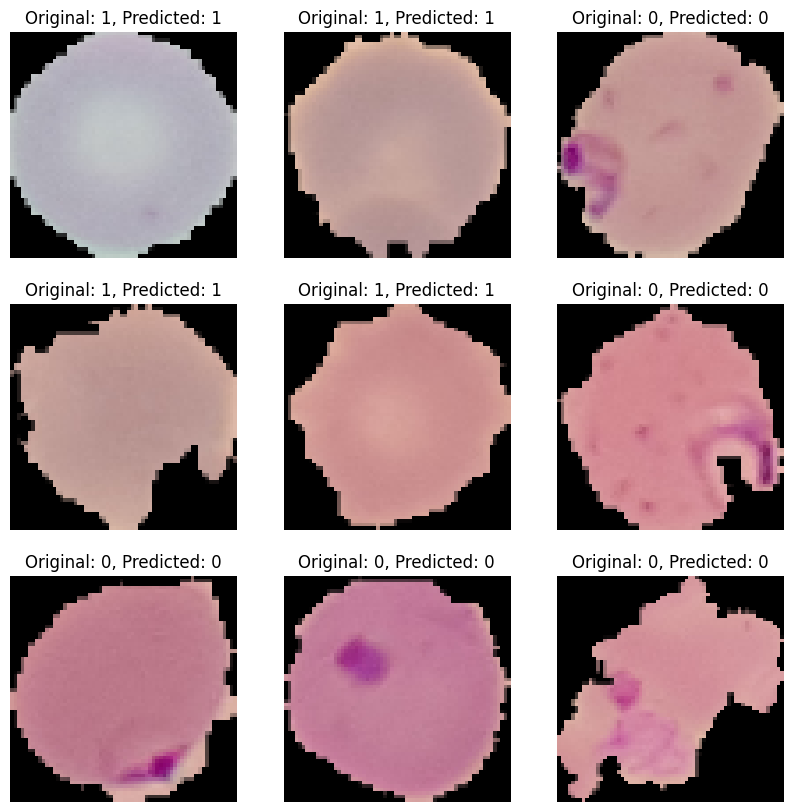

In [ ]:
import matplotlib.pyplot as plt

# Visualization of predicted versus original images
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Original: {labels[i].numpy()}, Predicted: {binary_predictions[i]}')
        plt.axis('off')
plt.show()


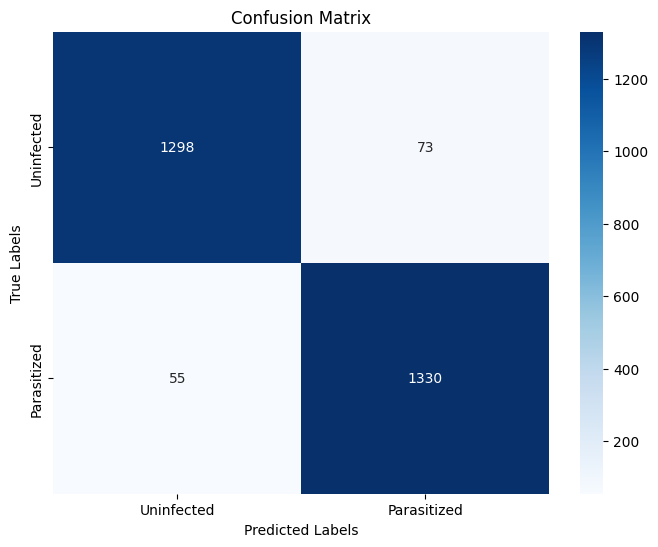

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Calculate accuracy
accuracy = accuracy_score(true_labels, binary_predictions)

# Calculate precision
precision = precision_score(true_labels, binary_predictions)

# Calculate recall (sensitivity)
recall = recall_score(true_labels, binary_predictions)

# Calculate F1 score
f1 = f1_score(true_labels, binary_predictions)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate balanced accuracy
sensitivity = recall
balanced_accuracy = (sensitivity + specificity) / 2

# Print all performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.95355587808418
Precision: 0.9479686386315039
Recall (Sensitivity): 0.9602888086642599
F1 Score: 0.9540889526542324
Specificity: 0.9467541940189642
Balanced Accuracy: 0.9535215013416121


The model demonstrates robust performance with an accuracy of 95.36%. Precision and recall scores of 94.80% and 96.03% respectively indicate balanced predictive capability. F1 score of 95.41% affirms overall model effectiveness. Specificity and balanced accuracy reinforce its ability to discern both classes effectively, ensuring reliable predictions.

**CONCLUSION**


Based on my analysis, the malaria detection model exhibits strong performance with an accuracy of 95.36%, ensuring reliable identification of infected cells. Precision and recall scores of 94.80% and 96.03% respectively underscore its effectiveness. These results validate the model's utility in assisting healthcare professionals, potentially revolutionizing malaria diagnosis and treatment.


If you have any inquiries, please don't hesitate to reach out to me at +254719729569. I'm here to assist you with any questions or concerns you may have.